<a href="https://colab.research.google.com/github/PadmaJyothi-U/Deep-Learning/blob/main/Back_Propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment-5**
---

### **Implementing the Back propagation algorithm**

Backpropagation is a widely used algorithm for training feedforward neural networks. It computes the gradient of the loss function with respect to the network weights. It is very efficient, rather than naively directly computing the gradient concerning each weight. This efficiency makes it possible to use gradient methods to train multi-layer networks and update weights to minimize loss; variants such as gradient descent or stochastic gradient descent are often used.

The backpropagation algorithm works by computing the gradient of the loss function with respect to each weight via the chain rule, computing the gradient layer by layer, and iterating backward from the last layer to avoid redundant computation of intermediate terms in the chain rule.

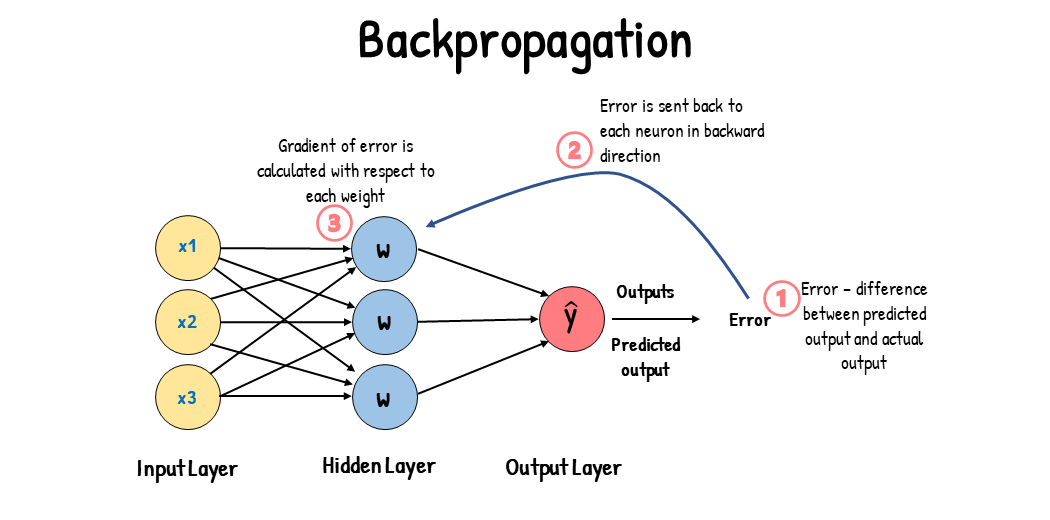

In [ ]:
from math import exp
from random import seed
from random import random

In [ ]:
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
 network = list()
 hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
 network.append(hidden_layer)
 output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
 network.append(output_layer)
 return network

In [ ]:
# Calculate neuron activation for an input
def activate(weights, inputs):
 activation = weights[-1]
 for i in range(len(weights)-1):
   activation += weights[i] * inputs[i]
 return activation

In [ ]:
# Transfer neuron activation
def transfer(activation):
 return 1.0 / (1.0 + exp(-activation))

In [ ]:
# Forward propagate input to a network output
def forward_propagate(network, row):
 inputs = row
 for layer in network:
  new_inputs = []
  for neuron in layer:
    activation = activate(neuron['weights'], inputs)
    neuron['output'] = transfer(activation)
    new_inputs.append(neuron['output'])
  inputs = new_inputs
 return inputs

In [ ]:
# Calculate the derivative of an neuron output
def transfer_derivative(output):
 return output * (1.0 - output)

In [ ]:
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
 for i in reversed(range(len(network))):
  layer = network[i]
  errors = list()

  if i != len(network)-1:
    for j in range(len(layer)):
      error = 0.0
    for neuron in network[i + 1]:
      error += (neuron['weights'][j] * neuron['delta'])
      errors.append(error)
  else:
    for j in range(len(layer)):
      neuron = layer[j]
      errors.append(neuron['output'] - expected[j])
  for j in range(len(layer)):
    neuron = layer[j]
    neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

In [ ]:
# Update network weights with error
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']

In [ ]:
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
   
    print("\n Network Training Begins:\n")
    
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    
    print("\n Network Training Ends:\n")

In [ ]:
#Test training backprop algorithm
seed(2) 
dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]]

print("\n The input Data Set :\n",dataset)
n_inputs = len(dataset[0]) - 1
print("\n Number of Inputs :\n",n_inputs)
n_outputs = len(set([row[-1] for row in dataset]))
print("\n Number of Outputs :\n",n_outputs)


 The input Data Set :
 [[2.7810836, 2.550537003, 0], [1.465489372, 2.362125076, 0], [3.396561688, 4.400293529, 0], [1.38807019, 1.850220317, 0], [3.06407232, 3.005305973, 0], [7.627531214, 2.759262235, 1], [5.332441248, 2.088626775, 1], [6.922596716, 1.77106367, 1], [8.675418651, -0.242068655, 1], [7.673756466, 3.508563011, 1]]

 Number of Inputs :
 2

 Number of Outputs :
 2


In [ ]:
#Network Initialization
network = initialize_network(n_inputs, 2, n_outputs)

# Training the Network
train_network(network, dataset, 0.5, 20, n_outputs)
print("\n Final Neural Network :")
 
i= 1
for layer in network:
    j=1
    for sub in layer:
        print("\n Layer[%d] Node[%d]:\n" %(i,j),sub)
        j=j+1
    i=i+1


 Network Training Begins:

>epoch=0, lrate=0.500, error=7.317
>epoch=1, lrate=0.500, error=8.334
>epoch=2, lrate=0.500, error=8.867
>epoch=3, lrate=0.500, error=9.161
>epoch=4, lrate=0.500, error=9.341
>epoch=5, lrate=0.500, error=9.460
>epoch=6, lrate=0.500, error=9.544
>epoch=7, lrate=0.500, error=9.606
>epoch=8, lrate=0.500, error=9.654
>epoch=9, lrate=0.500, error=9.691
>epoch=10, lrate=0.500, error=9.722
>epoch=11, lrate=0.500, error=9.747
>epoch=12, lrate=0.500, error=9.768
>epoch=13, lrate=0.500, error=9.785
>epoch=14, lrate=0.500, error=9.801
>epoch=15, lrate=0.500, error=9.814
>epoch=16, lrate=0.500, error=9.826
>epoch=17, lrate=0.500, error=9.836
>epoch=18, lrate=0.500, error=9.845
>epoch=19, lrate=0.500, error=9.854

 Network Training Ends:


 Final Neural Network :

 Layer[1] Node[1]:
 {'weights': [0.9564917906946954, 0.9464316011967685, 0.055967744595817596], 'output': 0.9999778236038537, 'delta': 2.1668026752840196e-07}

 Layer[1] Node[2]:
 {'weights': [0.335818077048993